# 导入包

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

# 一、数据导入及预处理

## 1.1 数据导入及数据可视化

In [2]:
# 设置字体
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
# 读入数据
data = pd.read_csv("./xAPI-Edu-Data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
# 查看buying的各value的数值
data.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

In [7]:
data.rename(index=str,columns={'gender':'Gender','NationalITy':'Nationality','raisedhands':'Raisedhands','VisITedResources':'Visitedresources'},
            inplace=True)

<AxesSubplot:xlabel='Class', ylabel='count'>

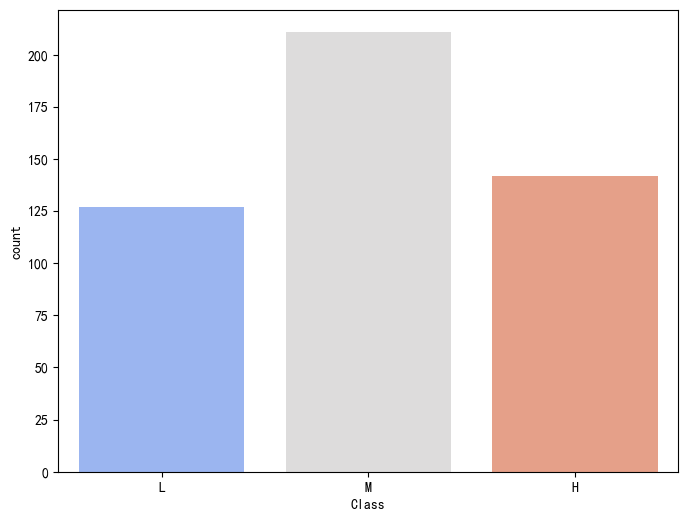

In [8]:
#可视化:
plt.figure(figsize=(8,6))
sns.countplot(x='Class',data=data,order=["L","M","H"],palette='coolwarm')

<AxesSubplot:xlabel='Class', ylabel='count'>

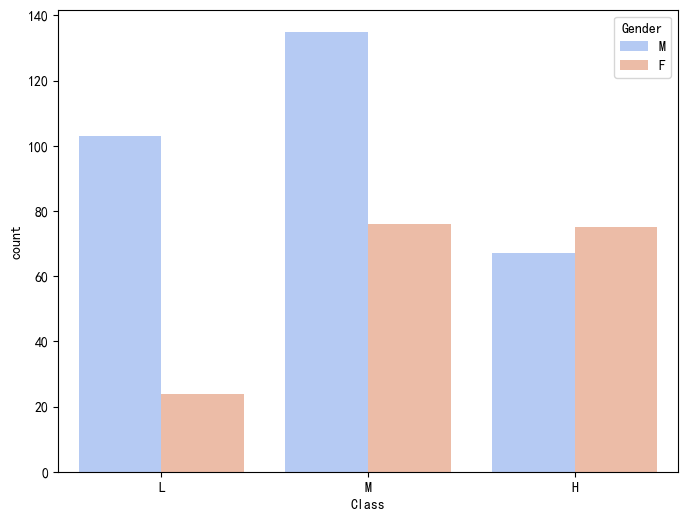

In [9]:
# 可以显示一个属性下面不同特征的数据
plt.figure(figsize=(8,6))
sns.countplot(x='Class',hue='Gender',data=data,order=['L','M','H'],palette='coolwarm')

<AxesSubplot:xlabel='Nationality', ylabel='count'>

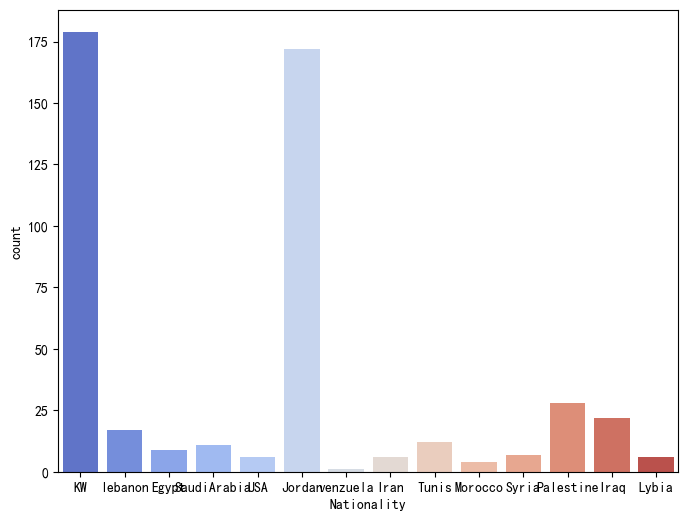

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Nationality',data=data,palette="coolwarm")

<AxesSubplot:xlabel='Class', ylabel='Visitedresources'>

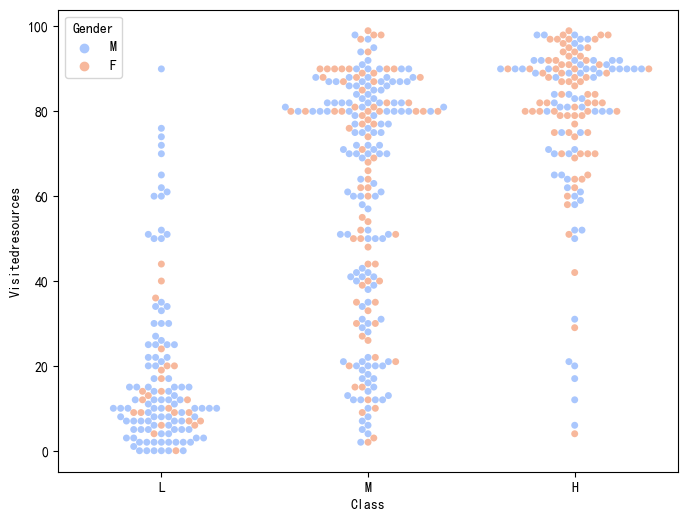

In [11]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="Class",y="Visitedresources",hue="Gender",order=["L","M","H"],data=data,palette="coolwarm")

## 1.2 数据预处理

In [12]:
str_columns = data.dtypes[data.dtypes=="object"].index
str_columns

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

### 1.2.1 数据编码

In [13]:
# 使用标签编码
for x in str_columns:
    lb = LabelEncoder()
    lb.fit(data[x])
    data[x]=lb.transform(data[x])

In [14]:
data.info()# 数据全部都变成数字类型

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    480 non-null    int32
 1   Nationality               480 non-null    int32
 2   PlaceofBirth              480 non-null    int32
 3   StageID                   480 non-null    int32
 4   GradeID                   480 non-null    int32
 5   SectionID                 480 non-null    int32
 6   Topic                     480 non-null    int32
 7   Semester                  480 non-null    int32
 8   Relation                  480 non-null    int32
 9   Raisedhands               480 non-null    int64
 10  Visitedresources          480 non-null    int64
 11  AnnouncementsView         480 non-null    int64
 12  Discussion                480 non-null    int64
 13  ParentAnsweringSurvey     480 non-null    int32
 14  ParentschoolSatisfaction  480 non-null    int32

In [15]:
data.Class.value_counts()

2    211
0    142
1    127
Name: Class, dtype: int64

### 1.2.2 标签分离

In [16]:
Y = data['Class']
X= data.drop("Class",axis=1)

In [17]:
Y

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int32

In [18]:
X

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,Raisedhands,Visitedresources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0


# 二、 训练集与测试集的划分

In [19]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [20]:
X_train.shape,Y_train.shape,x_test.shape,y_test.shape

((336, 16), (336,), (144, 16), (144,))

# 三 、逻辑回归分类

In [21]:
# 使用逻辑回归的分类方法
lr = LogisticRegression()

In [22]:
# 开始训练模型
lr.fit(X_train,Y_train)

LogisticRegression()

In [136]:
# 预测模型
y_pred_lr = lr.predict(x_test)

In [137]:
print("log回归得分：",lr.score(x_test,y_test))

log回归得分： 0.7083333333333334


In [138]:
# 打印准确率，召回率，f1得分
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.74      0.64        35
           1       0.82      0.85      0.84        39
           2       0.74      0.61      0.67        70

    accuracy                           0.71       144
   macro avg       0.71      0.73      0.72       144
weighted avg       0.72      0.71      0.71       144



In [139]:
y_pred_train = lr.predict(X_train)

In [140]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       107
           1       0.81      0.83      0.82        88
           2       0.68      0.72      0.70       141

    accuracy                           0.74       336
   macro avg       0.75      0.74      0.74       336
weighted avg       0.74      0.74      0.73       336



In [141]:
confusion_matrix(Y_train,y_pred_train)

array([[ 73,   2,  32],
       [  0,  73,  15],
       [ 25,  15, 101]], dtype=int64)

In [142]:
confusion_matrix(y_test,y_pred_lr)

array([[26,  0,  9],
       [ 0, 33,  6],
       [20,  7, 43]], dtype=int64)

Text(0.5, 1.0, '混淆矩阵热力图')

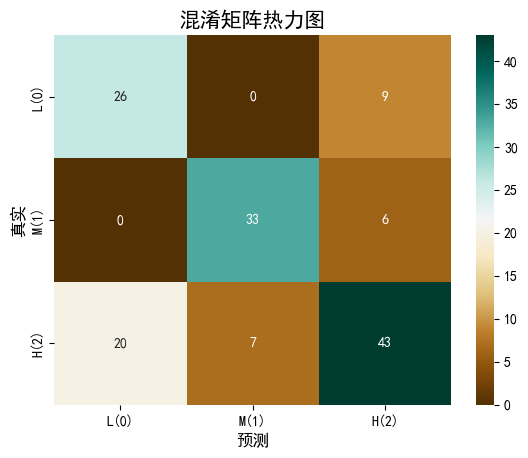

In [143]:
# 绘制热力图：annot=True表示显示数值，fmt="d"表示显示的是非科学计数法，cmap="BrBG"指定配色
ax= sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt="d",cmap='BrBG',
           xticklabels=["L(0)","M(1)","H(2)"],
           yticklabels=["L(0)","M(1)","H(2)"])
ax.set_ylabel('真实',fontsize=12)
ax.set_xlabel("预测",fontsize=12)
ax.set_title("混淆矩阵热力图",fontsize=15)

In [144]:
# 单独打印正确率得分
print(round(accuracy_score(y_pred_lr,y_test),4))

0.7083


In [145]:
# 单独打印f1得分
# average的参数选取[None, 'micro', 'macro', 'weighted'].
print("lg回归f1得分:",round(f1_score(y_pred_lr,y_test,average='macro'),4))

lg回归f1得分: 0.7164


In [146]:
# 单独打印精确率得分
print(round(precision_score(y_test,y_pred_lr,average='macro'),4))

0.7105


In [147]:
# 单独打印召回率得分
print(round(recall_score(y_pred_lr,y_test,average='macro'),4))

0.7105


# 四、KNN分类

In [149]:
knn = KNeighborsClassifier()

In [150]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [151]:
y_pred_knn = knn.predict(x_test)

In [152]:
print("KNN得分：",round(knn.score(x_test,y_test),5))
print(classification_report(y_test, y_pred_knn))

KNN得分： 0.58333
              precision    recall  f1-score   support

           0       0.42      0.51      0.46        35
           1       0.76      0.74      0.75        39
           2       0.59      0.53      0.56        70

    accuracy                           0.58       144
   macro avg       0.59      0.60      0.59       144
weighted avg       0.59      0.58      0.59       144



In [153]:
knn_score = [KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train).score(x_test, y_test) for k in range(1,10)]

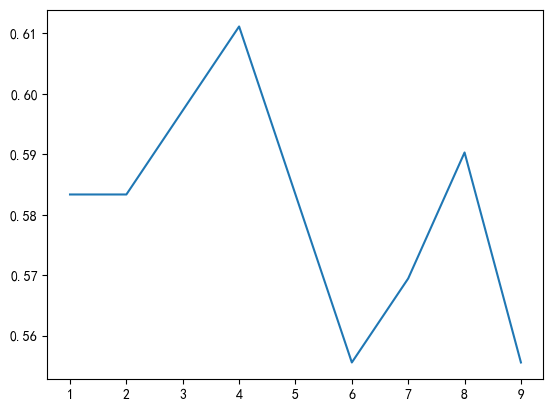

In [154]:
plt.plot(range(1,10),knn_score)

In [155]:
max(knn_score)

0.6111111111111112

In [156]:
knn_score_w = [KNeighborsClassifier(n_neighbors=k,weights="distance").fit(X_train,Y_train).score(x_test, y_test) for k in range(1,10)]

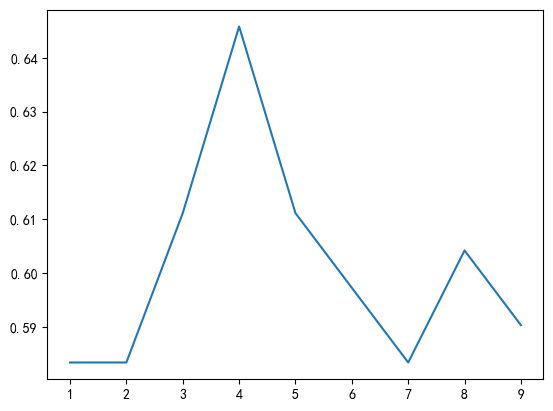

In [157]:
plt.plot(range(1,10),knn_score_w)

In [158]:
max(knn_score_w)

0.6458333333333334

In [159]:
knn_score_w_p3 = [KNeighborsClassifier(n_neighbors=k,weights="distance",metric="minkowski",p=3).fit(X_train,Y_train).score(x_test, y_test) for k in range(1,10)]

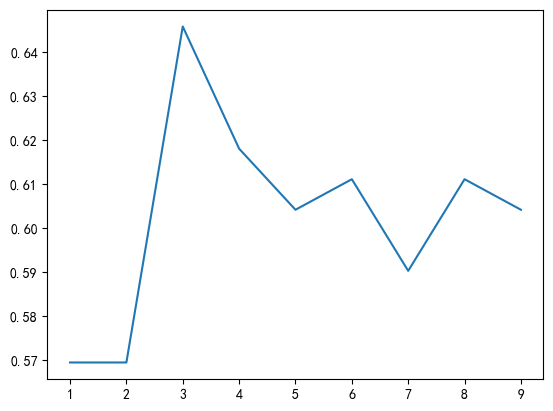

In [160]:
plt.plot(range(1,10),knn_score_w_p3)

In [161]:
max(knn_score_w_p3)

0.6458333333333334

Text(0, 0.5, 'precision')

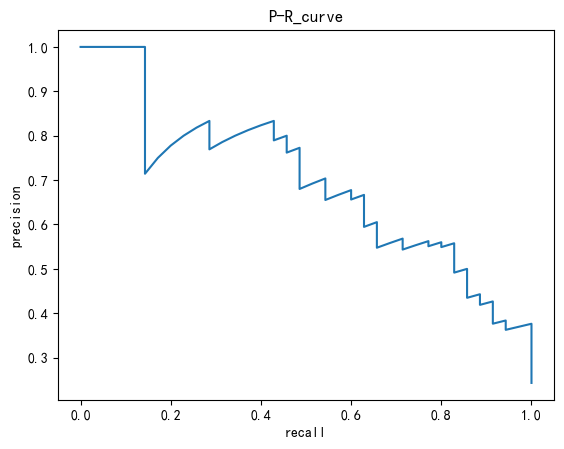

In [162]:
probs = lr.predict_proba(x_test)[:,0]
precision,recall,thresholds=precision_recall_curve(y_test,probs,pos_label=0)
plt.plot(recall,precision)
plt.title("P-R_curve")
plt.xlabel("recall")
plt.ylabel("precision")

Text(0, 0.5, 'tpc')

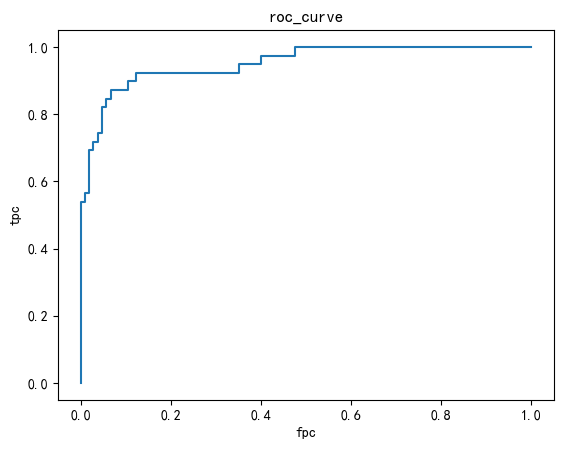

In [163]:
probs = lr.predict_proba(x_test)[:,1]
fgr,tpr,thresholds=roc_curve(y_test,probs,pos_label=1)
plt.plot(fgr,tpr)
plt.title("roc_curve")
plt.xlabel("fpc")
plt.ylabel("tpc")

# 五、决策树

In [49]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(random_state=7,max_depth=5,criterion="entropy")
dt = DecisionTreeClassifier(random_state=7,max_depth=4,criterion="entropy")
dt.fit(X_train,Y_train)
y_pred_dt = dt.predict(x_test)

In [201]:
print(dt.score(X_train,Y_train))

0.8035714285714286


In [202]:
print("决策树得分:",dt.score(x_test,y_test))

决策树得分: 0.7083333333333334


In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62        35
           1       0.82      0.82      0.82        39
           2       0.73      0.66      0.69        70

    accuracy                           0.71       144
   macro avg       0.71      0.72      0.71       144
weighted avg       0.72      0.71      0.71       144



In [206]:
y_pred_dt_X = dt.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred_dt_X))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       107
           1       0.93      0.89      0.91        88
           2       0.73      0.85      0.78       141

    accuracy                           0.80       336
   macro avg       0.83      0.80      0.81       336
weighted avg       0.81      0.80      0.80       336



Text(0.5, 1.0, 'confusion_matrix')

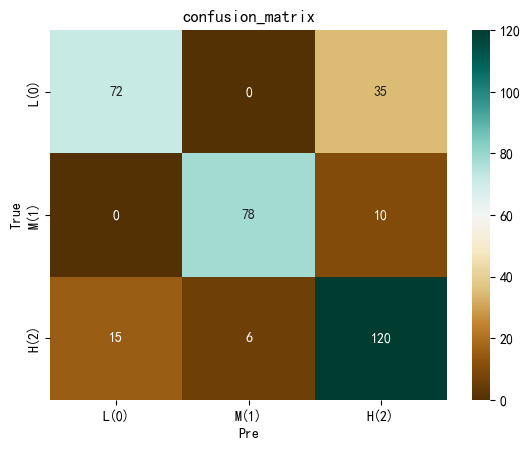

In [208]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(Y_train,y_pred_dt_X),annot=True,fmt="d",cmap='BrBG',
           xticklabels=["L(0)","M(1)","H(2)"],
           yticklabels=["L(0)","M(1)","H(2)"])
ax.set_ylabel("True")
ax.set_xlabel("Pre")
ax.set_title("confusion_matrix")

<AxesSubplot:title={'center':'特征重要性'}>

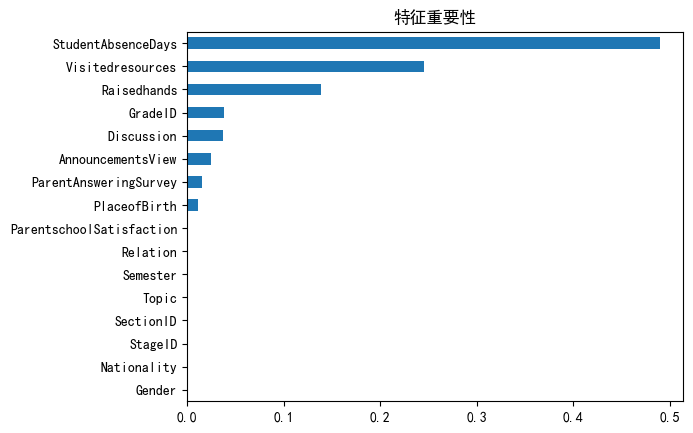

In [172]:
pd.Series(dt.feature_importances_,index=X_train.columns).sort_values().plot(kind = "barh",title="特征重要性")

In [173]:
depth_grid = [1,2,3,4,5,6,7,8,9,None]
depth_score = [DecisionTreeClassifier(random_state=10,max_depth=i,criterion="entropy").fit(X_train,Y_train).score(x_test,y_test) for i in depth_grid]

In [174]:
max(depth_score),np.argmax(depth_score)

(0.75, 9)

In [175]:
depth_score

[0.4652777777777778,
 0.6388888888888888,
 0.625,
 0.7152777777777778,
 0.7361111111111112,
 0.7152777777777778,
 0.7291666666666666,
 0.7361111111111112,
 0.7152777777777778,
 0.75]

<function matplotlib.pyplot.show(close=None, block=None)>

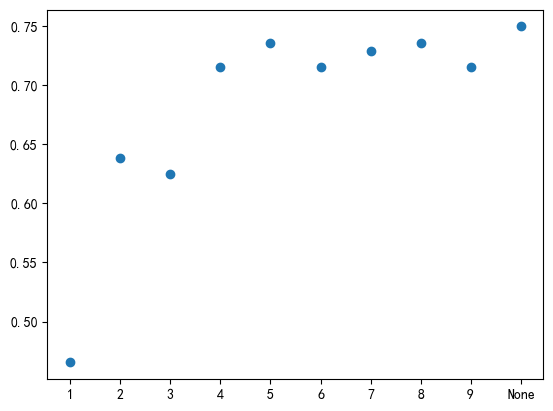

In [176]:
plt.scatter(range(len(depth_grid)),depth_score)
plt.xticks(range(10),[str(i) for i in depth_grid])
plt.show

In [177]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [178]:
#决策树变文件
export_graphviz(dt,out_file="./tree.dot",feature_names=X_train.columns,rounded=True)

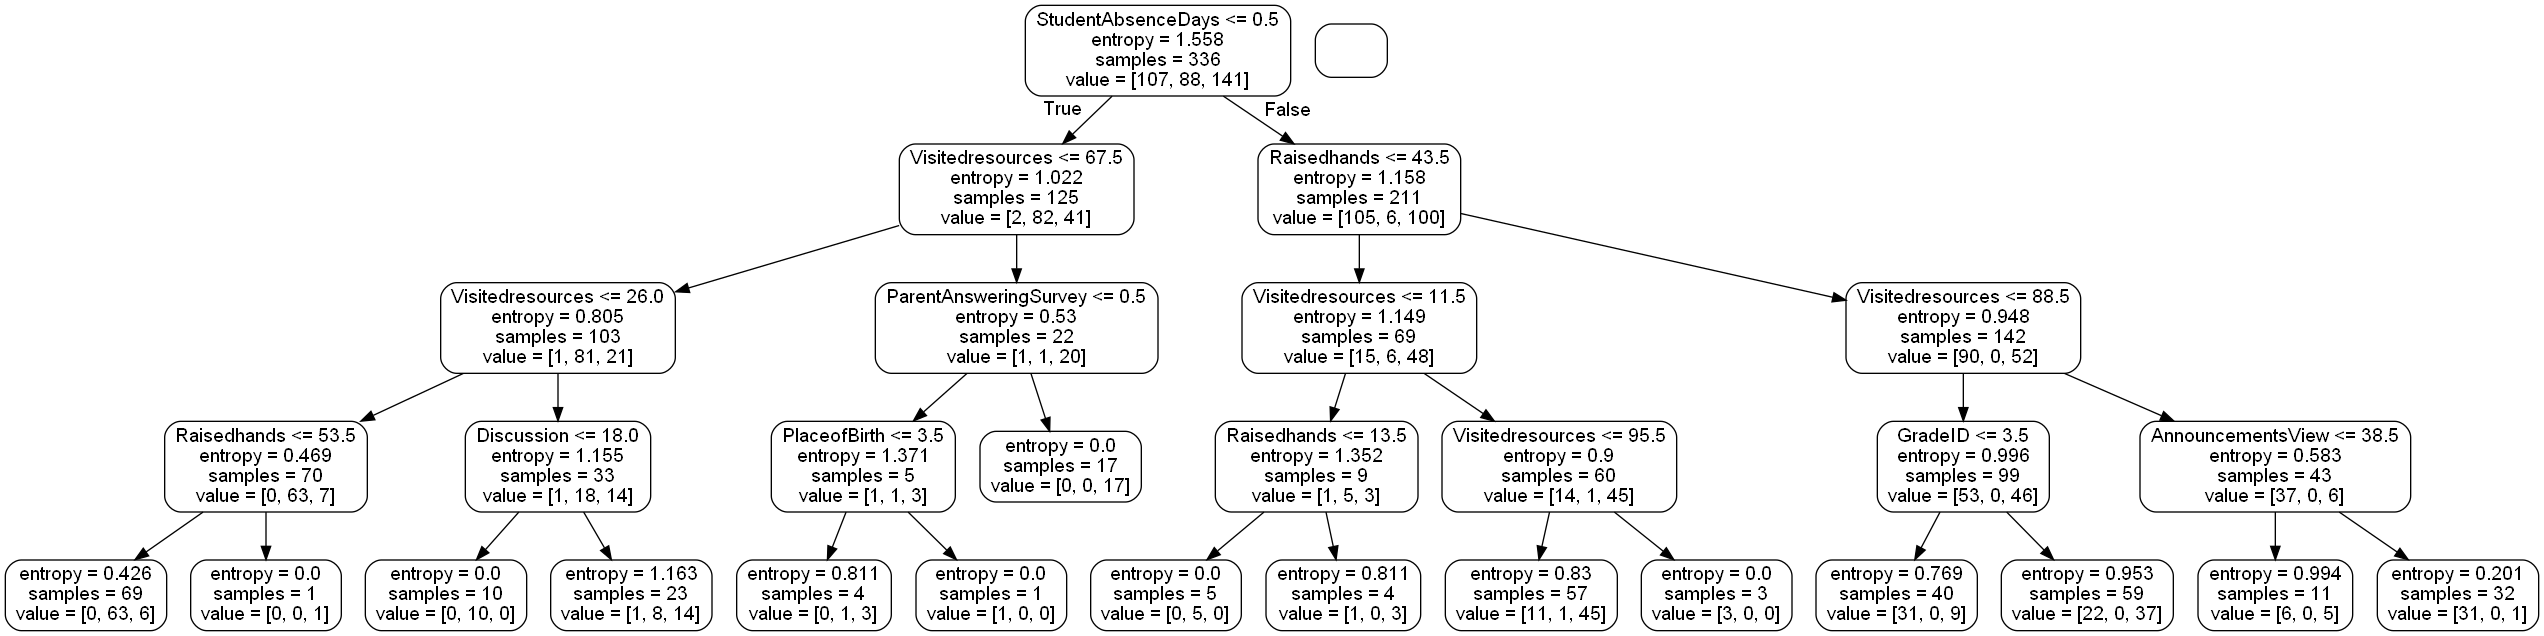

In [179]:
# dot文件变成图
graph = pydotplus.graph_from_dot_file("./tree.dot")
# 显示图
Image(graph.create_png())

In [180]:
#决策树变文件
export_graphviz(dt,out_file="./tree.dot",feature_names=X_train.columns,rounded=True,filled=True,
                class_names=["L","M","H"])

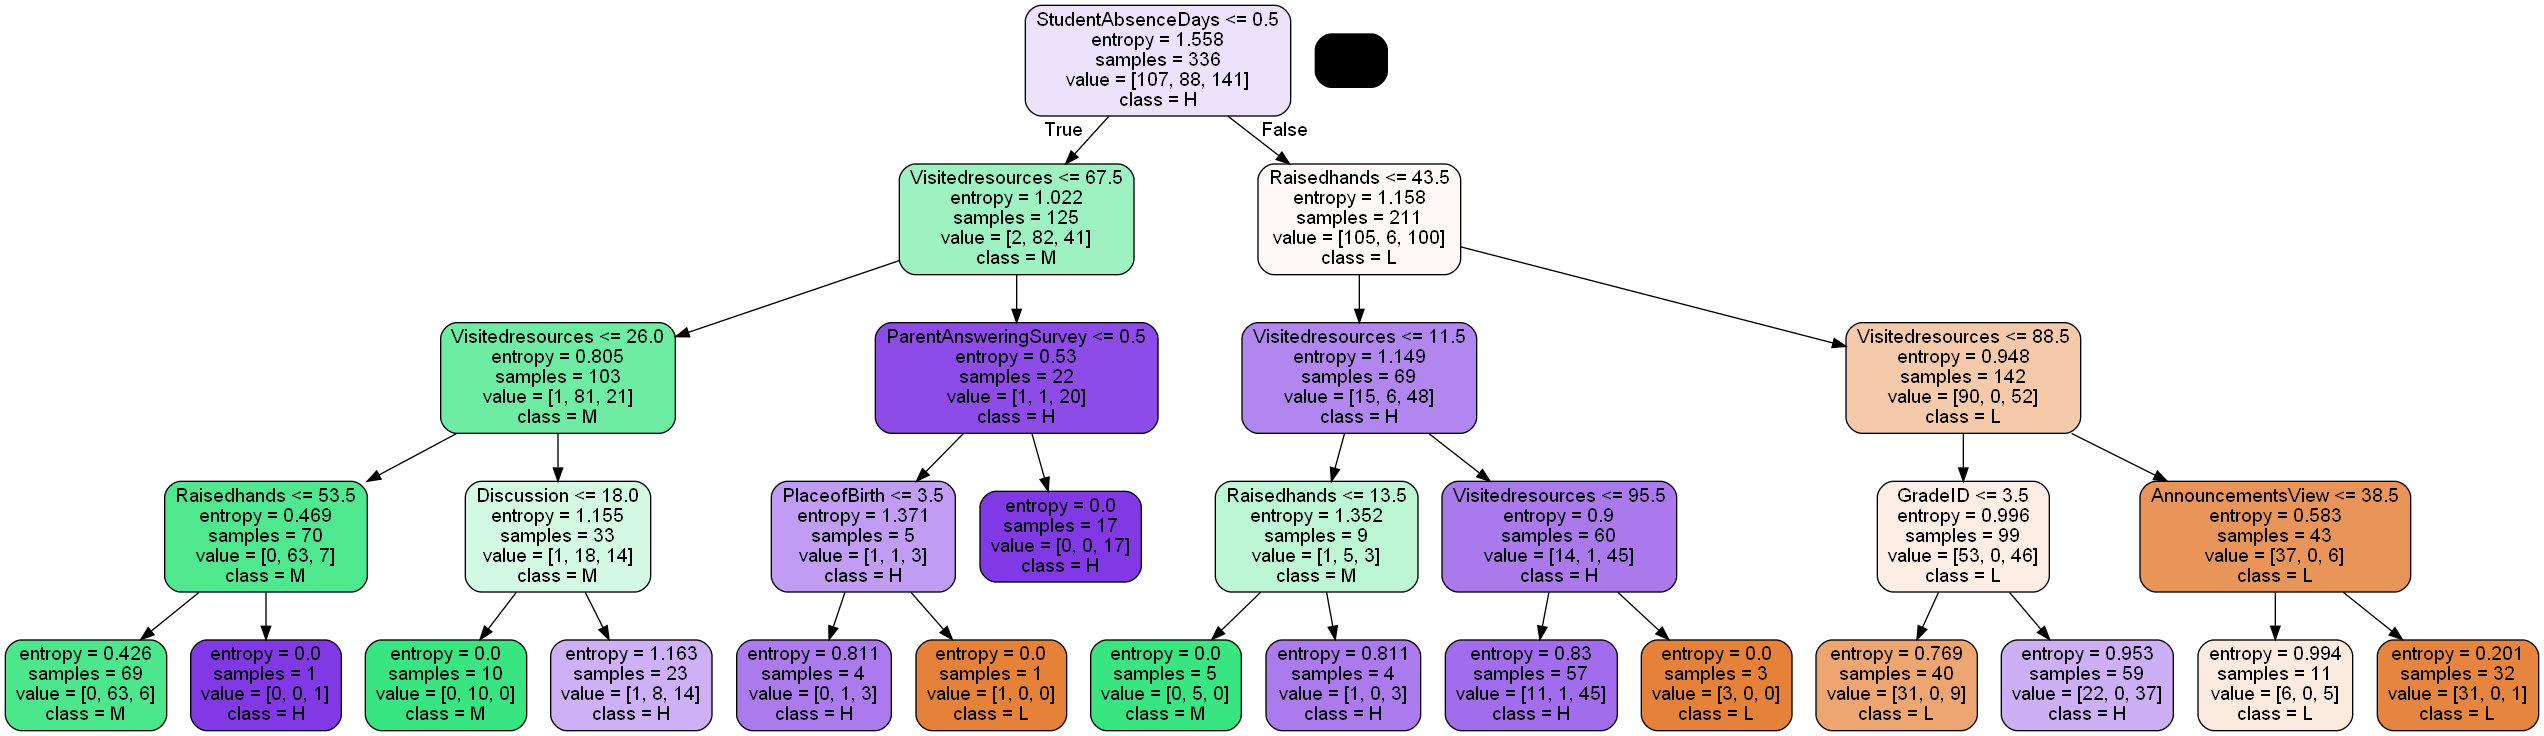

In [90]:
# dot文件变成图
graph = pydotplus.graph_from_dot_file("./tree.dot")
# 显示图
Image(graph.create_png())

# 六、朴素贝叶斯

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [219]:
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
y_pred_GBN = GNB.predict(x_test)
print("GNB得分:",GNB.score(x_test,y_test))
print(classification_report(y_test,y_pre_BNB))
print("GNB f1得分:",f1_score(y_pred_GBN,y_test,average='micro'))

GNB得分: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.72      0.60      0.66        35
           1       0.69      0.69      0.69        39
           2       0.66      0.71      0.68        70

    accuracy                           0.68       144
   macro avg       0.69      0.67      0.68       144
weighted avg       0.68      0.68      0.68       144

GNB f1得分: 0.7291666666666665


In [220]:
BNB = BernoulliNB()
BNB.fit(X_train,Y_train)
y_pre_BNB = BNB.predict(x_test)
print("BNB得分",BNB.score(x_test,y_test))
print(classification_report(y_test,y_pre_BNB))
print("GNB f1得分:",f1_score(y_pre_BNB,y_test,average='micro'))

BNB得分 0.6805555555555556
              precision    recall  f1-score   support

           0       0.72      0.60      0.66        35
           1       0.69      0.69      0.69        39
           2       0.66      0.71      0.68        70

    accuracy                           0.68       144
   macro avg       0.69      0.67      0.68       144
weighted avg       0.68      0.68      0.68       144

GNB f1得分: 0.6805555555555556


In [221]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
y_pre_MNB = MNB.predict(x_test)
print("MNB得分:",MNB.score(x_test,y_test))
print(classification_report(y_test,y_pre_MNB))
print("GNB f1得分:",f1_score(y_pre_MNB,y_test,average='micro'))

MNB得分: 0.5138888888888888
              precision    recall  f1-score   support

           0       0.36      0.57      0.44        35
           1       0.68      0.77      0.72        39
           2       0.55      0.34      0.42        70

    accuracy                           0.51       144
   macro avg       0.53      0.56      0.53       144
weighted avg       0.54      0.51      0.51       144

GNB f1得分: 0.5138888888888888


# 七、SVC

In [94]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [222]:
SVC_ = SVC()
SVC_.fit(X_train,Y_train)
y_pre_svc = SVC_.predict(x_test)
print("得分：",SVC_.score(x_test,y_test))
print(classification_report(y_test,y_pre))
print("SVC f1得分：",f1_score(y_pre_svc,y_test,average='micro'))

得分： 0.6180555555555556
              precision    recall  f1-score   support

           0       0.36      0.57      0.44        35
           1       0.68      0.77      0.72        39
           2       0.55      0.34      0.42        70

    accuracy                           0.51       144
   macro avg       0.53      0.56      0.53       144
weighted avg       0.54      0.51      0.51       144

SVC f1得分： 0.6180555555555556


In [110]:
kernel_grid = ['poly','sigmoid']
kernel_score=[SVC(kernel=k,random_state=10).fit(X_train,Y_train).score(x_test,y_test) for k in kernel_grid]

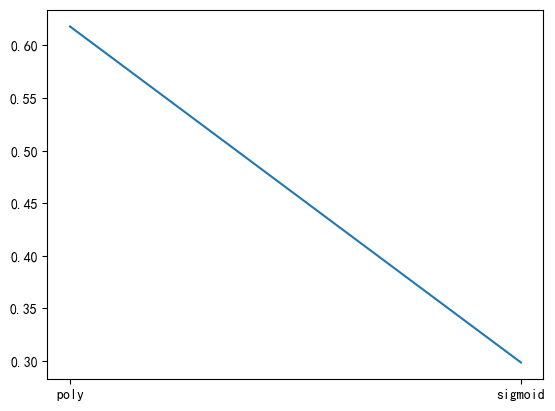

In [97]:
plt.plot(kernel_grid,kernel_score)

In [117]:
print(SVC_.support_vectors_)

[[ 1.  4.  4. ...  1.  1.  1.]
 [ 1.  8. 11. ...  1.  0.  1.]
 [ 0.  3.  3. ...  1.  1.  1.]
 ...
 [ 0. 12. 12. ...  1.  1.  1.]
 [ 0.  3.  3. ...  1.  1.  0.]
 [ 0.  4.  4. ...  1.  1.  1.]]


In [118]:
SVC_L = LinearSVC()

In [119]:
SVC_L.fit(X_train,Y_train)

LinearSVC()

In [226]:
y_pre_svc_l = SVC_L.predict(x_test)
print("SVC_L得分：",SVC_L.score(x_test,y_test))
print(classification_report(y_test,y_pre_svc_l))
print("SVC_L f1得分：",f1_score(y_pre_svc_l,y_test,average='micro'))

SVC_L得分： 0.5486111111111112
              precision    recall  f1-score   support

           0       0.39      0.86      0.54        35
           1       0.74      0.90      0.81        39
           2       0.67      0.20      0.31        70

    accuracy                           0.55       144
   macro avg       0.60      0.65      0.55       144
weighted avg       0.62      0.55      0.50       144

SVC_L f1得分： 0.5486111111111112


# 八、总结

In [132]:
print("log回归得分：",lr.score(x_test,y_test))
print("KNN得分：",round(knn.score(x_test,y_test),5))
print("决策树得分:",dt.score(x_test,y_test))
print("MNB得分:",MNB.score(x_test,y_test))
print("GNB得分:",GNB.score(x_test,y_test))
print("BNB得分",BNB.score(x_test,y_test))
print("得分：",SVC_.score(x_test,y_test))
print("SVC_L得分：",SVC_L.score(x_test,y_test))
max([lr.score(x_test,y_test),round(knn.score(x_test,y_test),5),dt.score(x_test,y_test),MNB.score(x_test,y_test),GNB.score(x_test,y_test),
    BNB.score(x_test,y_test),SVC_.score(x_test,y_test),SVC_L.score(x_test,y_test)])

log回归得分： 0.7083333333333334
KNN得分： 0.58333
决策树得分: 0.7083333333333334
MNB得分: 0.5138888888888888
GNB得分: 0.7291666666666666
BNB得分 0.6805555555555556
得分： 0.6180555555555556
SVC_L得分： 0.5486111111111112


0.7291666666666666

In [228]:
print("lg回归f1得分:",round(f1_score(y_pred_lr,y_test,average='macro'),4))
print("knn f1得分:",round(f1_score(y_pred_knn,y_test,average='macro'),4))
print("决策树 f1得分:",round(f1_score(y_pred_dt,y_test,average='macro'),4))
print("GNB f1得分:",round(f1_score(y_pred_GBN,y_test,average='macro'),4))
print("BNB f1得分:",f1_score(y_pre_BNB,y_test,average='micro'))
print("MNB f1得分:",f1_score(y_pre_MNB,y_test,average='micro'))
print("SVC f1得分:",f1_score(y_pre_svc,y_test,average='micro'))
print("SVC_L f1得分:",f1_score(y_pre_svc_l,y_test,average='micro'))

lg回归f1得分: 0.7164
knn f1得分: 0.5904
决策树 f1得分: 0.7119
GNB f1得分: 0.7374
BNB f1得分: 0.6805555555555556
MNB f1得分: 0.5138888888888888
SVC f1得分: 0.6180555555555556
SVC_L f1得分: 0.5486111111111112


In [ ]:
综上：对于pd.read_csv("./xAPI-Edu-Data.csv"")这个数据集，使用GNB来进行建模效果最好
